In [1]:
import pandas as pd

In [2]:
df = pd.read_json('post_process_data.json')
docs = df['content']
docs = [doc.split() for doc in docs.to_list()]

In [3]:
import gensim 
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.models.ldamulticore import LdaMulticore
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
id2word = corpora.Dictionary(docs)
corpus = [id2word.doc2bow(text) for text in docs]

In [5]:
coherence = []

for k in range(5,50,10):
    lda_model = LdaMulticore(corpus=corpus,
                        id2word=id2word,
                        num_topics=k,
                        random_state=1,
                        passes=25,
                        workers=10)
    coherence.append(CoherenceModel(model=lda_model, texts=docs, dictionary=id2word, coherence='c_v').get_coherence())

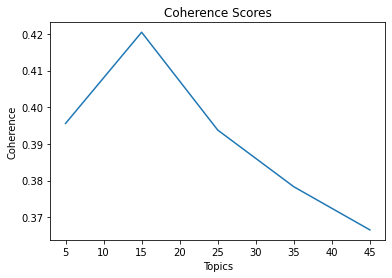

In [6]:
plt.plot(range(5,50,10),coherence)
plt.title('Coherence Scores')
plt.xlabel('Topics')
plt.ylabel('Coherence')
plt.show()

In [10]:
coherence = []

for k in range(10,24,2):
    lda_model = LdaMulticore(corpus=corpus,
                        id2word=id2word,
                        num_topics=k,
                        random_state=1,
                        passes=25,
                        workers=10)
    coherence.append(CoherenceModel(model=lda_model, texts=docs, dictionary=id2word, coherence='c_v').get_coherence())

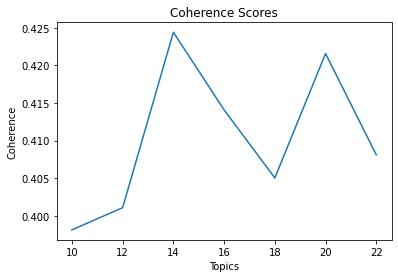

In [11]:
plt.plot(range(10,24,2),coherence)
plt.title('Coherence Scores')
plt.xlabel('Topics')
plt.ylabel('Coherence')
plt.show()

In [6]:
lda_model = LdaMulticore(corpus=corpus,
                    id2word=id2word,
                    num_topics=14,
                    random_state=1,
                    passes=25,
                    workers=10)

In [14]:
topics = []
for topic in lda_model.print_topics():
    topics.append([term[term.index('*')+1:].replace('"','') for term in topic[1].split(' + ')])
pd.DataFrame(topics,index=[f'Topic {x}' for x in range(14)])

,0,1,2,3,4,5,6,7,8,9
Topic 0,vaccination,travel,need,show,take,require,card,work,covid19,vaccinate
Topic 1,vaccinate,covid19,death,case,dose,report,people,vaccination,fully,new
Topic 2,one,death,get,know,take,die,people,would,go,work
Topic 3,datum,covid19,pfizer,read,show,release,say,medical,study,report
Topic 4,military,year,old,government,people,say,give,kill,country,doctor
Topic 5,covid19,shot,get,booster,year,dose,vaccination,day,pfizer,may
Topic 6,child,kid,mask,stop,people,parent,work,vax,well,covid19
Topic 7,death,people,rate,high,vaccinate,country,come,vaccination,world,population
Topic 8,go,make,like,good,covid19,news,coronavirus,get,know,would
Topic 9,biden,trump,say,get,president,like,pandemic,people,take,still


In [ ]:
from PIL import Image
import numpy as np

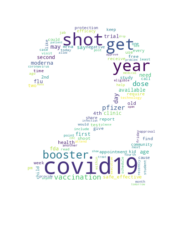

In [22]:
topic_0 = lda_model.get_topic_terms(5,100)
topic_0 = {id2word[i[0]]:i[1] for i in topic_0}
cloud = WordCloud(mask=np.array(Image.open("two_mask.jpg")),background_color='white').generate_from_frequencies(topic_0)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

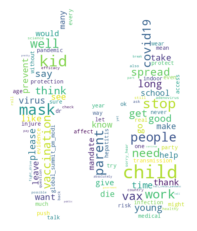

In [15]:
topic_0 = lda_model.get_topic_terms(6,100)
topic_0 = {id2word[i[0]]:i[1] for i in topic_0}
cloud = WordCloud(mask=np.array(Image.open("family_mask.jpg")),background_color='white').generate_from_frequencies(topic_0)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

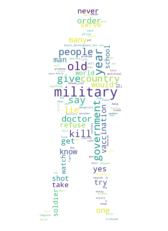

In [18]:
topic_0 = lda_model.get_topic_terms(4,100)
topic_0 = {id2word[i[0]]:i[1] for i in topic_0}
cloud = WordCloud(mask=np.array(Image.open("military_mask.jpg")),background_color='white').generate_from_frequencies(topic_0)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

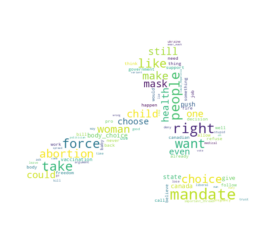

In [13]:
topic_0 = lda_model.get_topic_terms(13,100)
topic_0 = {id2word[i[0]]:i[1] for i in topic_0}
cloud = WordCloud(width=800,height=800,mask=np.array(Image.open("mandate_mask.webp")),background_color='white').generate_from_frequencies(topic_0)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

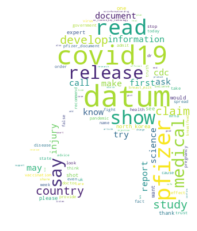

In [16]:
topic_0 = lda_model.get_topic_terms(3,100)
topic_0 = {id2word[i[0]]:i[1] for i in topic_0}
cloud = WordCloud(width=800,height=800,mask=np.array(Image.open("scientist_mask.gif")),background_color='white').generate_from_frequencies(topic_0)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
coherence = []

for k in range(5,50,10):
    lda_model = LdaMulticore(corpus=corpus,
                        id2word=id2word,
                        num_topics=k,
                        random_state=1,
                        passes=25,
                        workers=10)
    coherence.append(CoherenceModel(model=lda_model, texts=docs, dictionary=id2word, coherence='c_npmi').get_coherence())

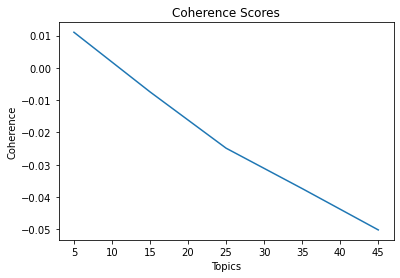

In [24]:
plt.plot(range(5,50,10),coherence)
plt.title('Coherence Scores')
plt.xlabel('Topics')
plt.ylabel('Coherence')
plt.show()

# Testing with different numbers of passes

In [15]:
from datetime import datetime
print(datetime.now())
lda_model = LdaMulticore(corpus=corpus,
                    id2word=id2word,
                    num_topics=14,
                    random_state=1,
                    passes=10,
                    workers=10)
print(datetime.now())
CoherenceModel(model=lda_model, texts=docs, dictionary=id2word, coherence='c_v').get_coherence()
topics = []
for topic in lda_model.print_topics():
    topics.append([term[term.index('*')+1:].replace('"','') for term in topic[1].split(' + ')])
pd.DataFrame(topics,index=[f'Topic {x}' for x in range(14)])

2022-05-24 21:34:42.427338
2022-05-24 21:34:56.430599


,0,1,2,3,4,5,6,7,8,9
Topic 0,vaccination,take,travel,show,need,vaccinate,covid19,go,would,work
Topic 1,vaccinate,covid19,death,case,dose,people,vaccination,still,get,report
Topic 2,one,get,death,vaccinate,know,die,take,people,would,biden
Topic 3,covid19,datum,read,country,develop,medical,may,vaccination,one,pfizer
Topic 4,year,old,people,get,say,military,lie,give,government,one
Topic 5,covid19,get,shot,year,booster,vaccination,flu,day,say,dose
Topic 6,people,child,mask,get,stop,work,covid19,kid,vaccination,well
Topic 7,people,death,vaccinate,rate,come,high,vaccination,country,like,much
Topic 8,go,get,like,make,good,know,covid19,would,say,news
Topic 9,trump,biden,get,say,like,still,pandemic,people,one,take


In [20]:
from datetime import datetime
print(datetime.now())
lda_model = LdaMulticore(corpus=corpus,
                    id2word=id2word,
                    num_topics=14,
                    random_state=1,
                    passes=25,
                    workers=10)
print(datetime.now())
CoherenceModel(model=lda_model, texts=docs, dictionary=id2word, coherence='c_v').get_coherence()
topics = []
for topic in lda_model.print_topics():
    topics.append([term[term.index('*')+1:].replace('"','') for term in topic[1].split(' + ')])
pd.DataFrame(topics,index=[f'Topic {x}' for x in range(14)])


2022-05-24 21:40:50.411530
2022-05-24 21:41:23.600179


,0,1,2,3,4,5,6,7,8,9
Topic 0,vaccination,need,travel,show,take,card,require,work,covid19,test
Topic 1,vaccinate,covid19,death,case,dose,report,people,vaccination,fully,risk
Topic 2,one,get,know,death,take,die,go,people,work,would
Topic 3,datum,covid19,pfizer,read,release,show,medical,develop,country,study
Topic 4,military,year,old,government,say,give,people,kill,country,doctor
Topic 5,covid19,shot,year,get,booster,vaccination,dose,day,pfizer,may
Topic 6,child,mask,kid,stop,vax,people,work,parent,well,vaccination
Topic 7,death,people,rate,high,country,come,vaccinate,world,vaccination,population
Topic 8,go,make,like,good,news,know,get,covid19,coronavirus,would
Topic 9,biden,trump,say,president,get,like,pandemic,people,take,lie


In [21]:
from datetime import datetime
print(datetime.now())
lda_model = LdaMulticore(corpus=corpus,
                    id2word=id2word,
                    num_topics=14,
                    random_state=1,
                    passes=50,
                    workers=10)
print(datetime.now())
CoherenceModel(model=lda_model, texts=docs, dictionary=id2word, coherence='c_v').get_coherence()
topics = []
for topic in lda_model.print_topics():
    topics.append([term[term.index('*')+1:].replace('"','') for term in topic[1].split(' + ')])
pd.DataFrame(topics,index=[f'Topic {x}' for x in range(14)])


2022-05-24 21:41:24.443187
2022-05-24 21:42:26.568174


,0,1,2,3,4,5,6,7,8,9
Topic 0,vaccination,need,travel,show,require,take,test,work,card,covid19
Topic 1,vaccinate,death,covid19,case,dose,report,vaccination,people,risk,new
Topic 2,one,get,know,take,well,go,year,work,death,would
Topic 3,pfizer,datum,covid19,release,read,study,say,show,country,develop
Topic 4,military,old,year,give,government,doctor,kill,say,people,country
Topic 5,covid19,booster,shot,year,get,vaccination,dose,may,pfizer,moderna
Topic 6,child,kid,mask,parent,stop,vax,need,young,work,spread
Topic 7,rate,death,people,country,high,come,world,vaccinate,vaccination,china
Topic 8,go,make,news,like,good,coronavirus,expert,covid19,know,would
Topic 9,biden,trump,lie,say,president,people,die,get,like,pandemic


In [ ]:
from datetime import datetime
print(datetime.now())
lda_model = LdaMulticore(corpus=corpus,
                    id2word=id2word,
                    num_topics=14,
                    random_state=1,
                    passes=100,
                    workers=10)
print(datetime.now())
CoherenceModel(model=lda_model, texts=docs, dictionary=id2word, coherence='c_v').get_coherence()
topics = []
for topic in lda_model.print_topics():
    topics.append([term[term.index('*')+1:].replace('"','') for term in topic[1].split(' + ')])
pd.DataFrame(topics,index=[f'Topic {x}' for x in range(14)])

In [14]:
topics = []
for topic in lda_model.print_topics():
    topics.append([term[term.index('*')+1:].replace('"','') for term in topic[1].split(' + ')])
pd.DataFrame(topics,index=[f'Topic {x}' for x in range(14)])

,0,1,2,3,4,5,6,7,8,9
Topic 0,vaccination,need,test,travel,require,take,show,work,card,covid19
Topic 1,death,vaccinate,covid19,case,people,report,vaccination,dose,risk,fully
Topic 2,well,one,get,know,take,go,hope,feel,year,work
Topic 3,pfizer,datum,covid19,show,study,read,release,say,report,develop
Topic 4,military,government,doctor,give,kill,country,year,say,people,old
Topic 5,covid19,booster,dose,shot,year,get,vaccination,may,first,second
Topic 6,child,kid,mask,parent,vax,stop,need,school,young,work
Topic 7,rate,death,country,people,world,high,come,china,vaccination,vaccinate
Topic 8,go,news,make,like,good,keep,coronavirus,look,expert,sorry_loss
Topic 9,biden,trump,lie,people,die,say,president,like,get,pandemic


In [22]:
from datetime import datetime
print(datetime.now())
lda_model = LdaMulticore(corpus=corpus,
                    id2word=id2word,
                    num_topics=20,
                    random_state=1,
                    passes=100,
                    workers=10)
print(datetime.now())
print(CoherenceModel(model=lda_model, texts=docs, dictionary=id2word, coherence='c_v').get_coherence())
topics = []
for topic in lda_model.print_topics():
    topics.append([term[term.index('*')+1:].replace('"','') for term in topic[1].split(' + ')])
pd.DataFrame(topics,index=[f'Topic {x}' for x in range(20)])

2022-05-24 21:43:32.154085
2022-05-24 21:45:32.169724
0.43005908916725605


,0,1,2,3,4,5,6,7,8,9
Topic 0,show,canada,health,mandate,vaccination,would,go,tweet,people,canadian
Topic 1,vaccinate,covid19,case,death,dose,report,vaccination,people,fully,population
Topic 2,one,free,death,get,time,know,u,care,take,make
Topic 3,read,please,datum,thread,say,pfizer,article,medical,study,doctor
Topic 4,military,government,order,give,people,country,help,member,serve,refuse
Topic 5,year,shot,booster,get,covid19,old,two,flu,dose,pfizer
Topic 6,child,kid,young,parent,hepatitis,vax,school,say,risk,work
Topic 7,rate,high,death,people,risk,number,come,datum,effective,know
Topic 8,develop,news,go,country,coronavirus,shot,justin_trudeau_doug_ford,sorry_loss,covidvaccine,food
Topic 9,biden,trump,lie,people,say,die,like,president,take,would
